In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 17572 files belonging to 38 classes.


In [68]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [84]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[199.25 192.25 200.25]
   [208.5  201.5  209.5 ]
   [200.5  193.5  201.5 ]
   ...
   [172.5  162.5  173.5 ]
   [136.25 125.5  138.75]
   [161.75 150.75 165.75]]

  [[192.75 185.75 193.75]
   [198.5  191.5  199.5 ]
   [201.   194.   202.  ]
   ...
   [139.5  129.5  138.  ]
   [144.25 134.25 143.25]
   [172.   162.   171.5 ]]

  [[200.75 193.75 201.75]
   [198.5  191.5  199.5 ]
   [199.5  192.5  200.5 ]
   ...
   [169.5  160.5  164.5 ]
   [169.5  160.5  164.  ]
   [157.75 148.75 151.75]]

  ...

  [[132.5  119.5  128.5 ]
   [130.75 117.75 126.75]
   [121.75 108.75 117.75]
   ...
   [102.5   87.5   94.5 ]
   [103.75  88.75  95.75]
   [105.    90.    97.  ]]

  [[127.75 114.75 123.75]
   [143.5  130.5  139.5 ]
   [127.25 114.25 123.25]
   ...
   [105.    90.    97.  ]
   [ 97.25  82.25  89.25]
   [100.25  85.25  92.25]]

  [[140.75 127.75 136.75]
   [118.25 105.25 114.25]
   [118.   105.   114.  ]
   ...
   [ 99.25  84.25  91.25]
   [ 92.5   77.5   84.5 ]
   [101.25  86.25  9

In [85]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [86]:
model=Sequential()

In [87]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))

In [88]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [89]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [90]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [91]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [92]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [93]:
model.add(Dropout(0.25))

In [94]:
model.add(Flatten())

In [95]:
model.add(Dense(units=1500,activation='relu'))

In [96]:
model.add(Dropout(0.4))

In [97]:
model.add(Dense(units=38,activation='softmax'))

In [98]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [100]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 4969s 2s/step - loss: 1.3690 - accuracy: 0.5947 - val_loss: 0.5655 - val_accuracy: 0.8230
Epoch 2/10
2197/2197 [==============================] - 4792s 2s/step - loss: 0.4413 - accuracy: 0.8606 - val_loss: 0.3624 - val_accuracy: 0.8823
Epoch 3/10
2197/2197 [==============================] - 4763s 2s/step - loss: 0.2701 - accuracy: 0.9125 - val_loss: 0.1999 - val_accuracy: 0.9370
Epoch 4/10
2197/2197 [==============================] - 5000s 2s/step - loss: 0.1829 - accuracy: 0.9395 - val_loss: 0.2302 - val_accuracy: 0.9252
Epoch 5/10
2197/2197 [==============================] - 5081s 2s/step - loss: 0.1342 - accuracy: 0.9555 - val_loss: 0.2676 - val_accuracy: 0.9218
Epoch 6/10
2197/2197 [==============================] - 4984s 2s/step - loss: 0.1082 - accuracy: 0.9639 - val_loss: 0.2033 - val_accuracy: 0.9391
Epoch 7/10
2197/2197 [==============================] - 5565s 3s/step - loss: 0.0894 - accuracy: 0.9710 - val_loss: 0.1844 -

In [101]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 1039s 471ms/step - loss: 0.0325 - accuracy: 0.9888


In [102]:
print(train_loss,train_acc)

0.03245607390999794 0.9888043403625488


In [103]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 [==============================] - 248s 451ms/step - loss: 0.1422 - accuracy: 0.9602


In [104]:
print(val_loss,val_acc)

0.14222601056098938 0.9602208137512207


In [152]:
#model.save("trained_model.h5")
model.save("trained_model.keras")

In [153]:
training_history.history

{'loss': [1.368969440460205,
  0.4412875175476074,
  0.2700709402561188,
  0.1828662008047104,
  0.1342143416404724,
  0.10817787796258926,
  0.08938197046518326,
  0.07330168783664703,
  0.06274151802062988,
  0.05702485516667366],
 'accuracy': [0.5946653485298157,
  0.8605875372886658,
  0.9124830961227417,
  0.9394551515579224,
  0.9555017948150635,
  0.9638807773590088,
  0.97099369764328,
  0.9759015440940857,
  0.9793868660926819,
  0.9815349578857422],
 'val_loss': [0.565491259098053,
  0.36243993043899536,
  0.19992870092391968,
  0.23022106289863586,
  0.26764872670173645,
  0.203327015042305,
  0.18436992168426514,
  0.1322489231824875,
  0.18285556137561798,
  0.14222590625286102],
 'val_accuracy': [0.8229569792747498,
  0.8823127746582031,
  0.9370020627975464,
  0.925165057182312,
  0.9218074083328247,
  0.9390507340431213,
  0.9500910639762878,
  0.9611882567405701,
  0.9482699632644653,
  0.9602208137512207]}

In [154]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [157]:
training_history.history['val_accuracy']

[0.8229569792747498,
 0.8823127746582031,
 0.9370020627975464,
 0.925165057182312,
 0.9218074083328247,
 0.9390507340431213,
 0.9500910639762878,
 0.9611882567405701,
 0.9482699632644653,
 0.9602208137512207]

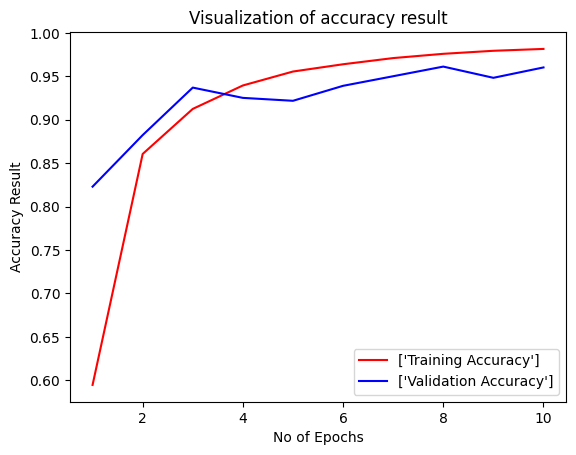

In [161]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label=['Training Accuracy'])
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label=['Validation Accuracy'])
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of accuracy result")
plt.legend()
plt.show()

In [162]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [163]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 17572 files belonging to 38 classes.


In [164]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 240s 436ms/step


(array([[7.0744145e-17, 7.3795840e-17, 1.0000000e+00, ..., 1.8864167e-20,
         1.4077225e-21, 1.9720961e-21],
        [1.0473061e-05, 3.1072733e-07, 3.2995295e-06, ..., 6.8744779e-09,
         4.8198523e-10, 1.4858463e-08],
        [1.5345536e-09, 8.7483942e-10, 9.3606227e-11, ..., 1.2907568e-11,
         3.5384673e-07, 6.5496906e-08],
        ...,
        [6.3115995e-13, 9.6158740e-17, 1.1611714e-15, ..., 1.2178996e-16,
         4.8746097e-18, 5.1558723e-12],
        [2.9001211e-19, 2.1712813e-24, 5.3271003e-20, ..., 1.6767398e-19,
         2.9546760e-23, 4.7432245e-22],
        [8.8490978e-11, 9.0755189e-14, 6.3768327e-14, ..., 2.1519616e-13,
         1.5922983e-14, 7.9378066e-14]], dtype=float32),
 (17572, 38))

In [165]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [166]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 2,  9, 32, ..., 10, 13,  4], dtype=int64)>

In [167]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [168]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  8, ...,  0, 13, 27], dtype=int64)>

In [169]:
from sklearn.metrics import classification_report,confusion_matrix

In [170]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.03      0.03      0.03       504
                                 Apple___Black_rot       0.03      0.03      0.03       497
                          Apple___Cedar_apple_rust       0.03      0.03      0.03       440
                                   Apple___healthy       0.03      0.03      0.03       502
                               Blueberry___healthy       0.03      0.03      0.03       454
          Cherry_(including_sour)___Powdery_mildew       0.03      0.03      0.03       421
                 Cherry_(including_sour)___healthy       0.04      0.04      0.04       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.02      0.03      0.03       410
                       Corn_(maize)___Common_rust_       0.02      0.02      0.02       477
               Corn_(maize)___Northern_Leaf_Blight       0.03      0.03      0.

In [171]:
cm=confusion_matrix(Y_true,predicted_categories)
cm

array([[17, 18, 17, ..., 16, 13, 11],
       [13, 15, 14, ..., 13, 14, 15],
       [15, 12, 11, ..., 14, 10,  6],
       ...,
       [13, 20,  7, ..., 19, 11, 15],
       [14, 14, 14, ..., 14, 13, 14],
       [13,  9, 15, ..., 13, 14, 16]], dtype=int64)

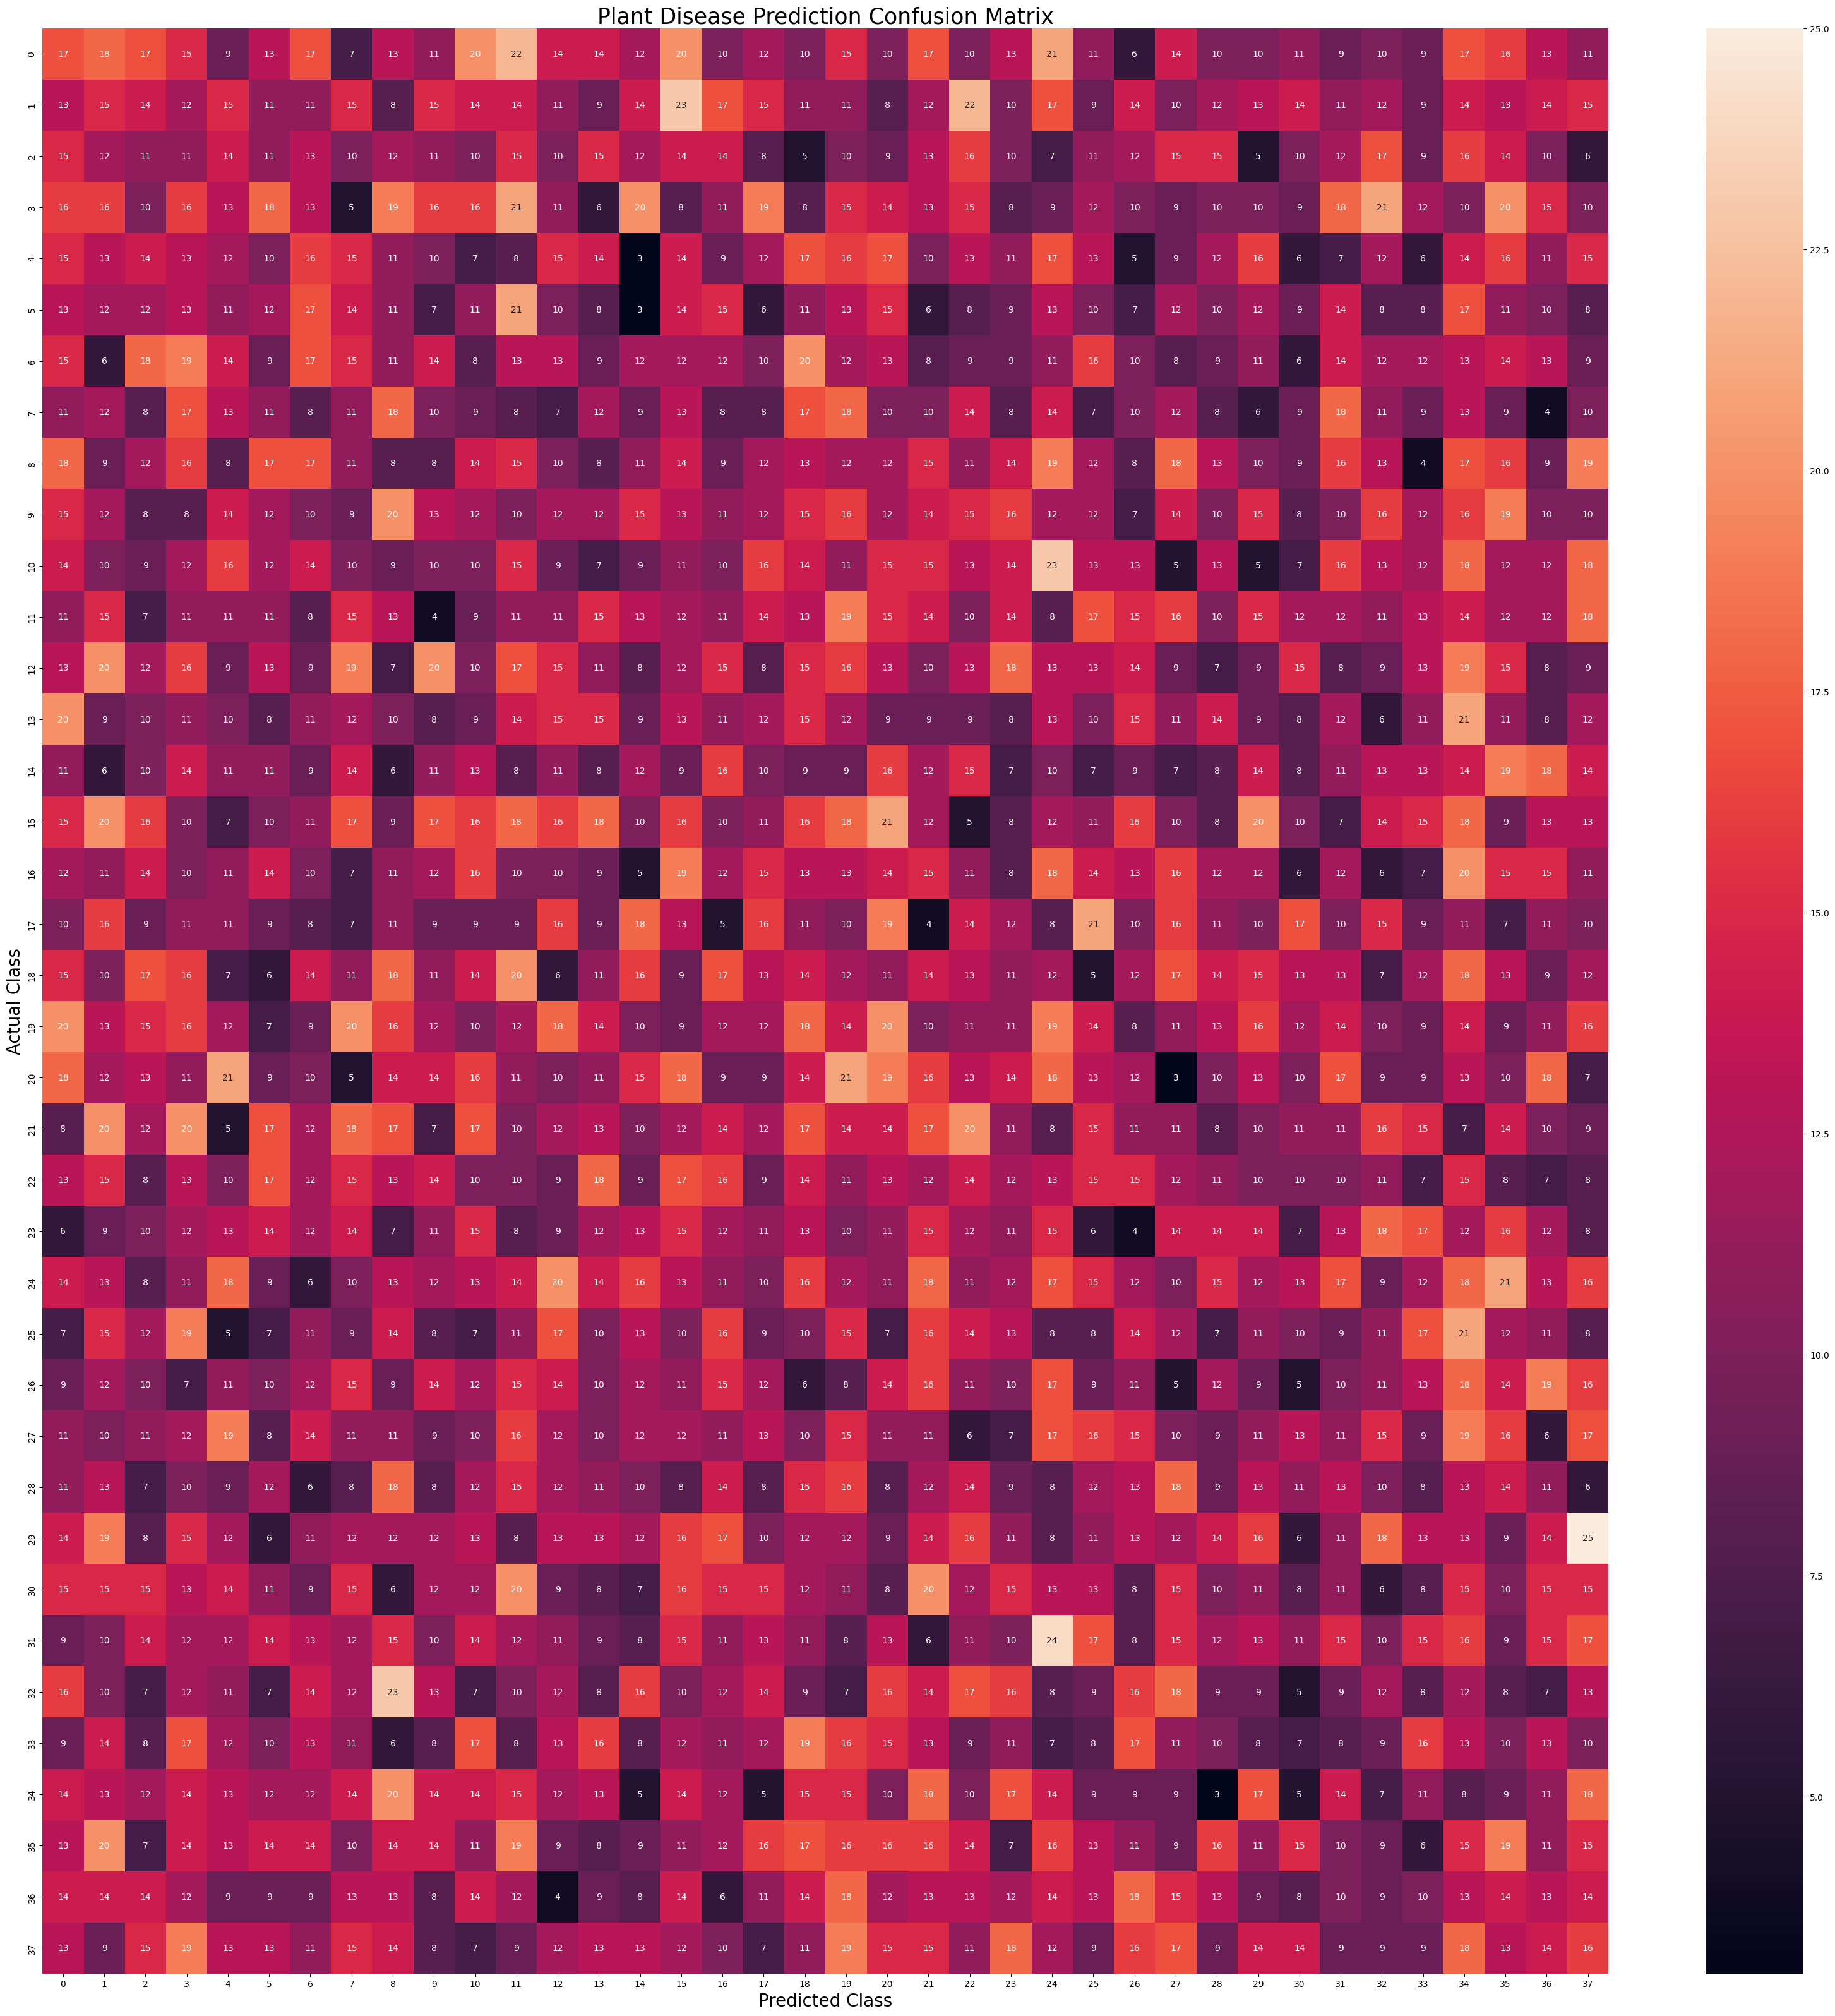

In [172]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

In [173]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [174]:
model=tf.keras.models.load_model('trained_model.keras')

In [175]:
!pip install opencv-python

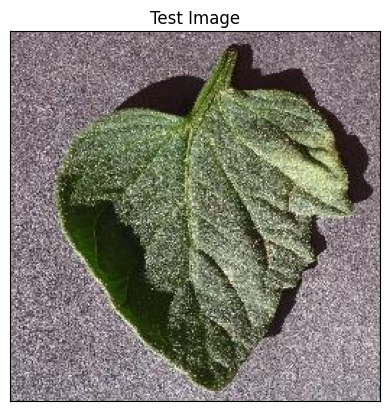

In [176]:
import cv2
image_path="test/test/TomatoHealthy1.JPG"
#reading image
img=cv2.imread(image_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #convert bgr image to rgb
#displaying image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [177]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr]) #convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [178]:
predictions=model.predict(input_arr)
predictions,predictions.shape

1/1 [==============================] - 0s 241ms/step


(array([[1.1475114e-16, 1.2630037e-17, 7.5700770e-17, 3.8232403e-12,
         1.4229947e-16, 4.5621964e-13, 8.4862982e-18, 8.5279622e-19,
         1.0985715e-20, 6.7220707e-21, 1.3243310e-21, 2.6558200e-22,
         4.4553607e-19, 2.4416585e-22, 4.7271147e-21, 1.7180550e-19,
         5.8257126e-19, 1.0778792e-18, 1.1874460e-18, 2.8310642e-16,
         2.1929553e-18, 7.7516834e-20, 1.7942167e-14, 1.4465653e-19,
         3.0502697e-16, 3.2702890e-13, 1.2206858e-16, 9.0380641e-18,
         1.1423821e-19, 2.4404624e-18, 8.9847908e-16, 6.3694726e-15,
         1.3265540e-16, 9.6250581e-15, 2.6370616e-08, 6.2649900e-21,
         6.9831120e-19, 1.0000000e+00]], dtype=float32),
 (1, 38))

In [179]:
result_index=np.argmax(predictions)
result_index

37

In [180]:
class_name=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)_Powdery_mildew',
 'Cherry_(including_sour)_healthy',
 'Corn_(maize)_Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)Common_rust',
 'Corn_(maize)_Northern_Leaf_Blight',
 'Corn_(maize)_healthy',
 'Grape___Black_rot',
 'Grape__Esca(Black_Measles)',
 'Grape__Leaf_blight(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange__Haunglongbing(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,bell__Bacterial_spot',
 'Pepper,bell__healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

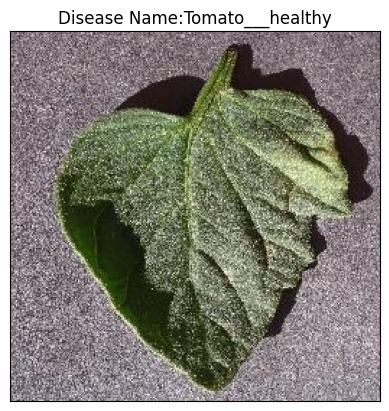

In [181]:
#displaying result of disease prediction
model_prediction=class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name:{model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [182]:
model_prediction

'Tomato___healthy'